In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

from terra_modules.terra_utils import get_time_series

## Parameters

In [11]:
# Countries
countries = ["IT", "FR", "DE"]

# Time series - countries
# https://api.terra.istat.it/cls/countries?lang=en

# Time series - partners
# https://api.terra.istat.it/cls/partners?lang=en

# Time series - products CPA
# https://api.terra.istat.it/cls/productsCPA?lang=en


# Define the request parameters
params = {
    "flow": "1",      # import = 1, export = 2
    "var": "00",      # product
    "partner": "AC",
    "dataType": "1",  # lag 12 months = 1, raw data = 2
    "tipovar": "1"    # euro = 1, kg = 2
}


## Get graph metrics from TERRA endpoints, then build the metrics dataframe

In [12]:
df_time_series = get_time_series(params, countries)

Endpoint: https://api.terra.istat.it/time-series/itsa
Starting data retrieval...
   Retrieving data for IT
   Retrieving data for FR
   Retrieving data for DE
... done!


In [13]:
df_time_series.to_csv("output/time_series.csv", index = False, sep = ";", decimal= ",")

In [14]:
df_time_series.tail()

,date,series,country
107,2023-01-01,10065363011,DE
108,2023-02-01,3556548518,DE
109,2023-03-01,-6843089293,DE
110,2023-04-01,-12960602477,DE
111,2023-05-01,-13421330154,DE


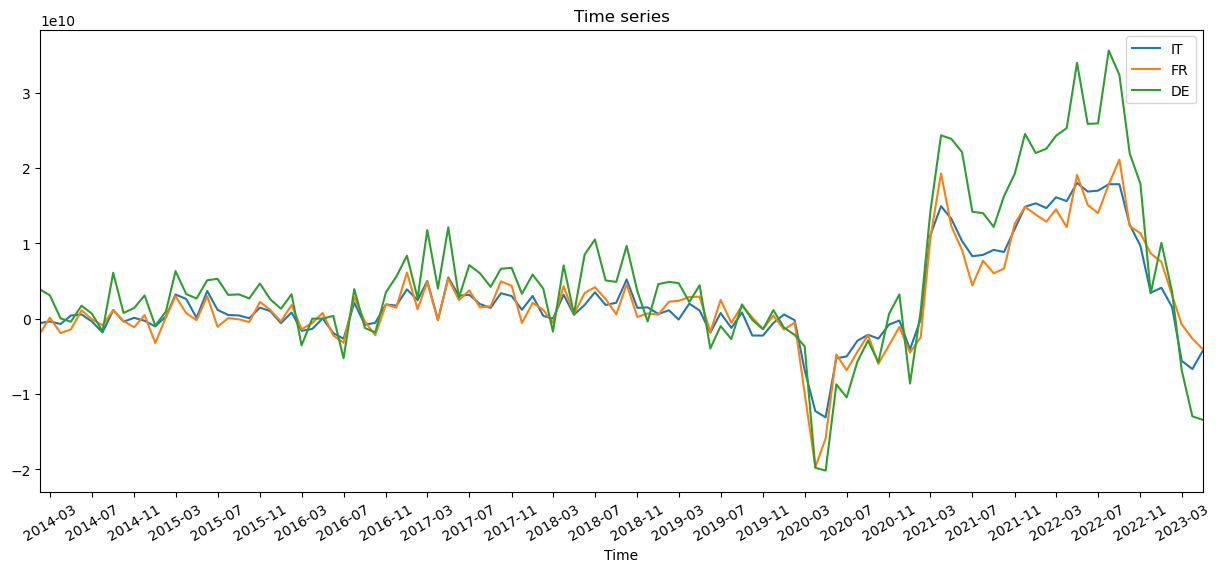

In [15]:
left = dt.date(2014, 2, 1)
right = dt.date(2023, 5, 1)

plt.figure(figsize=(15,6))

for country in countries:
    plt.plot(df_time_series["date"].unique(), df_time_series[df_time_series['country'] == country]["series"], label=country)

plt.title('Time series')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('')
plt.legend()

# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 

# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)  

# Changes x-axis range
plt.gca().set_xbound(left, right)

plt.show()